In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
#Creating our data frame
teacher_db = pd.read_csv('tae.data')

In [ ]:
# Renaming the first columns of our data frame
teacher_db.rename(columns = {'1' : 'Language', '23' : 'Instructor', 
                             '3' : 'Course', '1.1' : 'Term', '19' : 'Class-size', 
                             '3.1' : 'Class-attribute'}, 
                  inplace = True)

In [ ]:
teacher_db.head()

,Language,Instructor,Course,Term,Class-size,Class-attribute
0,2,15,3,1,17,3
1,1,23,3,2,49,3
2,1,5,2,2,33,3
3,2,7,11,2,55,3
4,2,23,3,1,20,3


In [ ]:
teacher_db.tail()

,Language,Instructor,Course,Term,Class-size,Class-attribute
145,2,3,2,2,26,1
146,2,10,3,2,12,1
147,1,18,7,2,48,1
148,2,22,1,2,51,1
149,2,2,10,2,27,1


In [ ]:
teacher_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Language         150 non-null    int64
 1   Instructor       150 non-null    int64
 2   Course           150 non-null    int64
 3   Term             150 non-null    int64
 4   Class-size       150 non-null    int64
 5   Class-attribute  150 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB


In [ ]:
teacher_db.describe()

,Language,Instructor,Course,Term,Class-size,Class-attribute
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,1.813333,13.580000,8.140000,1.853333,27.926667,2.013333
std,0.390949,6.805318,7.034937,0.354958,12.916405,0.819123
min,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
25%,2.000000,8.000000,3.000000,2.000000,19.000000,1.000000
50%,2.000000,13.000000,4.500000,2.000000,27.000000,2.000000
75%,2.000000,20.000000,15.000000,2.000000,37.000000,3.000000
max,2.000000,25.000000,26.000000,2.000000,66.000000,3.000000


In [ ]:
# To check the class distribution
teacher_db['Class-attribute'].value_counts()

3    51
2    50
1    49
Name: Class-attribute, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


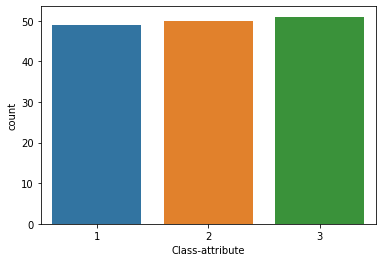

In [ ]:
# We now have a balanced class distribution
sns.countplot(teacher_db['Class-attribute'])

In [ ]:
# Defining our x and y data frame in preparation for split, and splitting our data into test and train
x = teacher_db.drop('Class-attribute', axis = 1)
y = teacher_db['Class-attribute'] - 1

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.1, stratify = y, random_state = 99)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
model = tf.keras.models.Sequential()

In [ ]:
#from tensorflow.keras.layers import Dropout
#from tensorflow.keras.layers import Dense


In [ ]:
#dropout = 0.2
#hiddenLayerTwo = 256

In [ ]:
# Applying our activation function to our model, relu activates the first layer while softmax activates the second
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(12, activation = 'tanh', input_shape = (5,)))
model.add(tf.keras.layers.Dense(12, activation = 'relu'))
model.add(tf.keras.layers.Dense(12, activation = 'relu'))
model.add(tf.keras.layers.Dense(3, activation = 'softmax'))


In [ ]:
# Compiling our model to set the speed as well as the stop loss or error index
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                72        
                                                                 
 dense_1 (Dense)             (None, 12)                156       
                                                                 
 dense_2 (Dense)             (None, 12)                156       
                                                                 
 dense_3 (Dense)             (None, 3)                 39        
                                                                 
Total params: 423
Trainable params: 423
Non-trainable params: 0
_________________________________________________________________


In [ ]:

history = model.fit(x_train, y_train, \
                    batch_size = 4, epochs = 35, \
                    verbose = 2, \
                    validation_split = 0.1)

Epoch 1/35
31/31 - 4s - loss: 1.0962 - accuracy: 0.3471 - val_loss: 1.1580 - val_accuracy: 0.1429 - 4s/epoch - 133ms/step
Epoch 2/35
31/31 - 0s - loss: 1.0804 - accuracy: 0.3554 - val_loss: 1.1366 - val_accuracy: 0.1429 - 266ms/epoch - 9ms/step
Epoch 3/35
31/31 - 0s - loss: 1.0691 - accuracy: 0.3554 - val_loss: 1.1364 - val_accuracy: 0.1429 - 218ms/epoch - 7ms/step
Epoch 4/35
31/31 - 0s - loss: 1.0599 - accuracy: 0.3636 - val_loss: 1.1188 - val_accuracy: 0.1429 - 271ms/epoch - 9ms/step
Epoch 5/35
31/31 - 0s - loss: 1.0487 - accuracy: 0.3636 - val_loss: 1.1145 - val_accuracy: 0.1429 - 290ms/epoch - 9ms/step
Epoch 6/35
31/31 - 0s - loss: 1.0386 - accuracy: 0.4545 - val_loss: 1.1008 - val_accuracy: 0.3571 - 256ms/epoch - 8ms/step
Epoch 7/35
31/31 - 0s - loss: 1.0249 - accuracy: 0.5041 - val_loss: 1.0868 - val_accuracy: 0.4286 - 198ms/epoch - 6ms/step
Epoch 8/35
31/31 - 0s - loss: 1.0092 - accuracy: 0.5289 - val_loss: 1.0642 - val_accuracy: 0.5000 - 233ms/epoch - 8ms/step
Epoch 9/35
31/31 

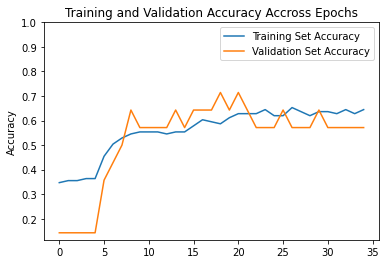

In [ ]:
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

plt.plot(accuracy, label = 'Training Set Accuracy')
plt.plot(validation_accuracy, label = 'Validation Set Accuracy')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.title('Training and Validation Accuracy Accross Epochs')
plt.legend()

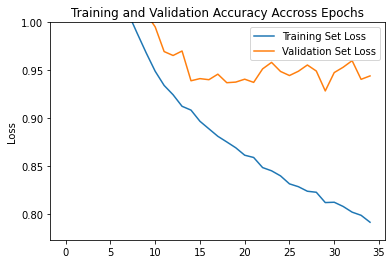

In [ ]:
loss = history.history['loss']
validation_loss = history.history['val_loss']

plt.plot(loss, label = 'Training Set Loss')
plt.plot(validation_loss, label = 'Validation Set Loss')
plt.ylabel('Loss')
plt.ylim([min(plt.ylim()), 1])
plt.title('Training and Validation Accuracy Accross Epochs')
plt.legend()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
y_pred = model.predict(x_test)
y_pred = y_pred.argmax(axis = 1)

1/1 [==============================] - 0s 242ms/step


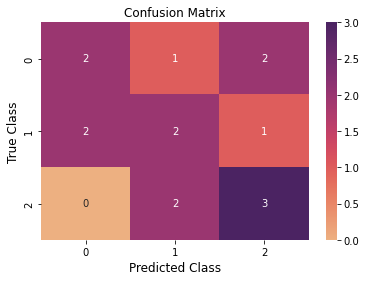

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(confusion_matrix, cmap = 'flare', annot = True, fmt = 'd')

plt.xlabel('Predicted Class', fontsize = 12)
plt.ylabel('True Class', fontsize = 12)
plt.title('Confusion Matrix', fontsize = 12)

plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.40      0.44         5
           1       0.40      0.40      0.40         5
           2       0.50      0.60      0.55         5

    accuracy                           0.47        15
   macro avg       0.47      0.47      0.46        15
weighted avg       0.47      0.47      0.46        15

